In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load your dataset
df = pd.read_csv(r"C:\Users\jilow\solar-challenge-w0\data\benin-malanville.csv")

Data profiling

In [4]:
# Dataset overview: Shape and info
print(f"Shape of dataset: {df.shape}")
print("Columns:", df.columns.tolist())
df.info()# Summary of data types and non-null counts
df.head()


Shape of dataset: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
# Descriptive statistics (numeric)
display(df.describe())

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [5]:
# Missing‐value report
miss = df.isna().sum()
display(miss[miss > 0])

Comments    525600
dtype: int64

In [ ]:
# Flag columns with >5% missing values
total = len(df)
for col, n in miss.items():
    if n/total > 0.05:
        print(f"⚠️ {col}: {n} missing ({n/total:.1%})")


⚠️ Comments: 525600 missing (100.0%)


Data cleaning

In [7]:
import numpy as np
from scipy.stats import zscore

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

In [8]:
# Drop totally empty or irrelevant columns
if 'Comments' in df.columns:
    df.drop(columns=['Comments'], inplace=True)

In [9]:
# Outlier detection via Z‐score on critical columns
cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
zs = df[cols].apply(zscore, nan_policy='omit')
outlier_mask = (np.abs(zs) > 3).any(axis=1)
print("Outliers flagged:", outlier_mask.sum())

Outliers flagged: 7740


In [10]:
# Remove outliers
df_clean = df.loc[~outlier_mask].copy()

In [11]:
# Impute remaining missing numeric values with median
for c in cols:
    med = df_clean[c].median()
    df_clean[c] = df_clean[c].fillna(med)

In [12]:
# Final check: no missing & reasonable shape
print("After cleaning shape:", df_clean.shape)
display(df_clean.isna().sum()[df_clean.isna().sum() > 0])

After cleaning shape: (517860, 18)


Series([], dtype: int64)

EDA

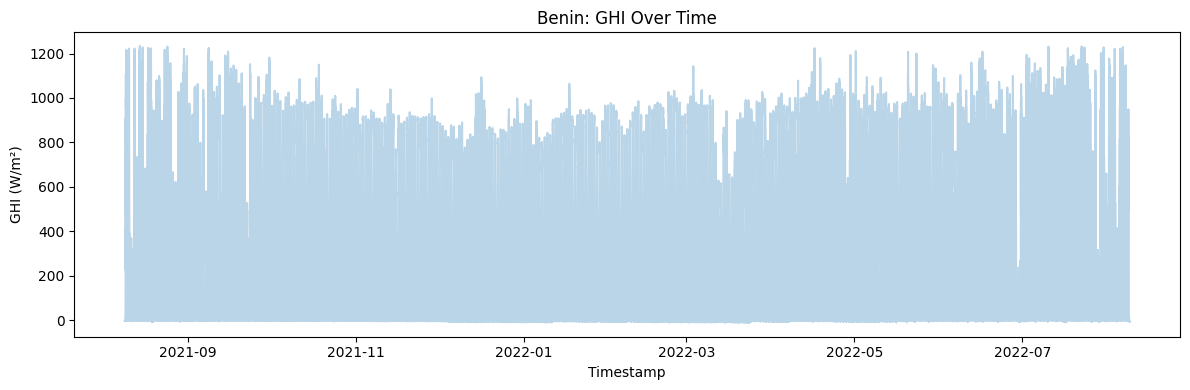

In [13]:
# Time series plot
plt.figure(figsize=(12,4))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.3)
plt.title('Benin: GHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()


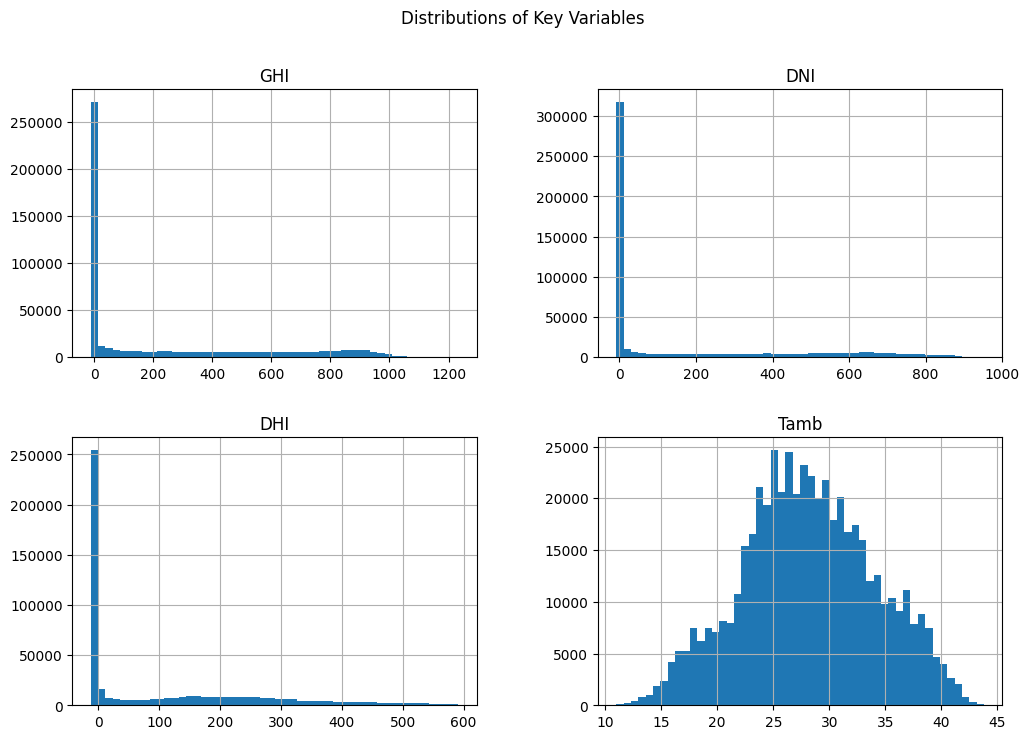

In [14]:
# Histogram & Distribution
df_clean[['GHI','DNI','DHI','Tamb']].hist(bins=50, figsize=(12,8))
plt.suptitle('Distributions of Key Variables')
plt.show()

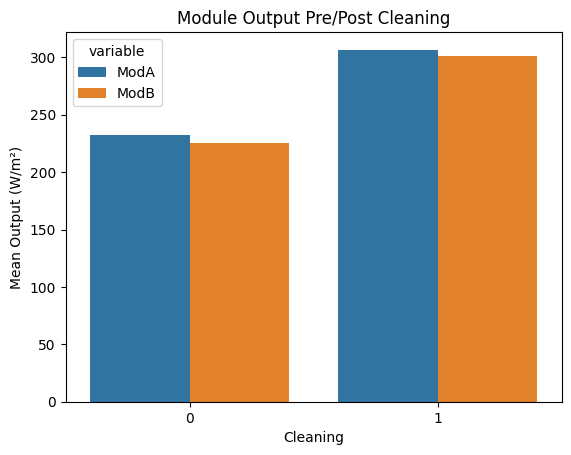

In [15]:
#cleaning impact on module output
cleaning_means = df_clean.groupby('Cleaning')[['ModA','ModB']].mean().reset_index()
sns.barplot(data=cleaning_means.melt(id_vars='Cleaning'),
            x='Cleaning', y='value', hue='variable')
plt.title('Module Output Pre/Post Cleaning')
plt.ylabel('Mean Output (W/m²)')
plt.show()


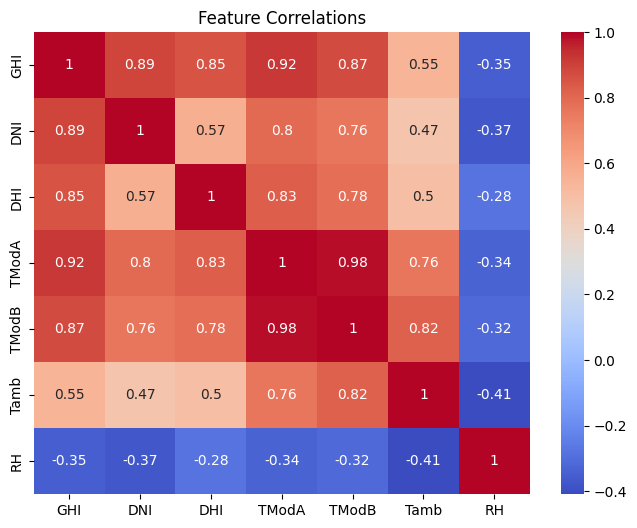

In [17]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

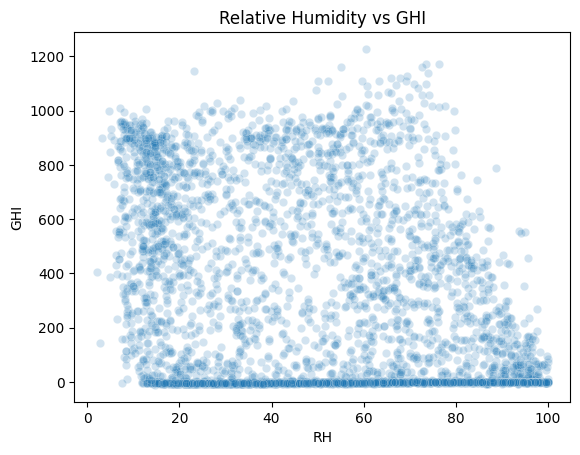

In [18]:
# Scatter relation
sns.scatterplot(data=df_clean.sample(5000), x='RH', y='GHI', alpha=0.2)
plt.title('Relative Humidity vs GHI')
plt.show()

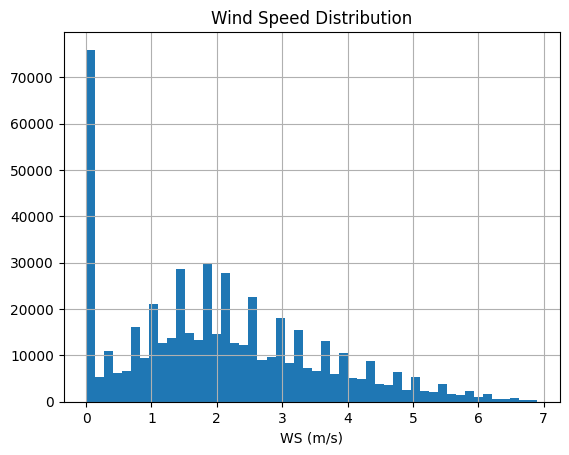

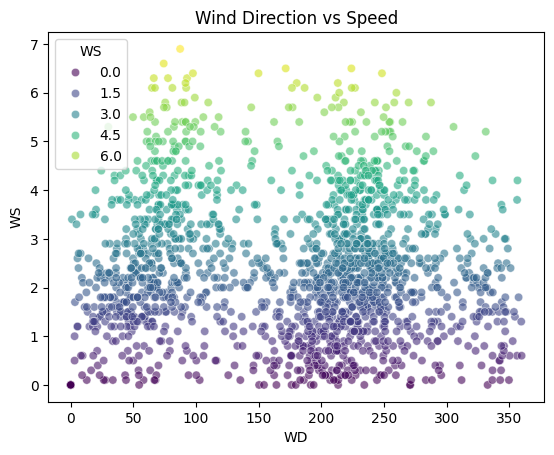

In [19]:
# Wind & Direction analysis
# Wind speed distribution
df_clean['WS'].hist(bins=50)
plt.title('Wind Speed Distribution')
plt.xlabel('WS (m/s)')
plt.show()
# Simple wind‐rose style scatter
sns.scatterplot(data=df_clean.sample(2000),
                x='WD', y='WS', hue='WS', palette='viridis', alpha=0.6)
plt.title('Wind Direction vs Speed')
plt.show()


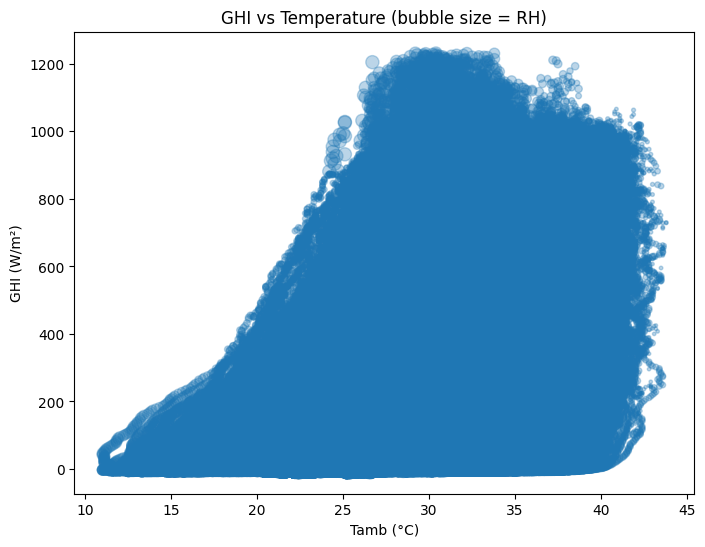

In [20]:
# Bubble chart: Temperature and humidity
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH'], alpha=0.3)
plt.title('GHI vs Temperature (bubble size = RH)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()


In [21]:
df_clean.to_csv('C:/Users/jilow/solar-challenge-w0/data/benin_clean.csv', index=False)